# Data Analysis - Velib Project in [Python](https://www.python.org/) <a href="https://www.python.org/"><img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" style="max-width: 35px; display: inline" alt="Python"/></a>&nbsp;

---
_Authors:_ Tom Brusseaux, Maïmouna Gadji,Natael Régnier, Tidiane Sall

In [80]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px


In [81]:
loading = pd.read_csv("velibLoading.csv",sep=" ")
loading.head()


  
coord =pd.read_csv("velibCoord.csv", sep=" ")
coord.head()
print(coord.shape)

(1189, 4)


##### <span style="color:purple"> On vérifie que il n'y ait pas de données manquantes ou dupliquées dans le dataset </span>

In [82]:
print("Cellules vides")
print('--- Loading ---')
A=loading.isna().sum().sort_values(ascending=False)
print(A.sum())
print('--- Coord ---')
B= coord.isna().sum().sort_values(ascending=False)
print(B.sum())

print("\n Données dupliquées")
print('--- Loading ---')
A=loading.duplicated().sum()
print(A)
print('--- Coord ---')
B=loading.duplicated().sum()
print(B)

Cellules vides
--- Loading ---
0
--- Coord ---
0

 Données dupliquées
--- Loading ---
0
--- Coord ---
0


##### <span style>Visiblement il y a 0 cellule vide dans le dataset et pas de données dupliquées </span>








##### <span style="color:red"> On vérifie la possibilité d'avoir plusieurs fois une station </span>

In [83]:
# Stations in descending order of occurrence
station_names = coord.names.value_counts().sort_values(ascending=False)

L=station_names[station_names>1]
print(L)

# --- #
print('')

# We display the station with the most occurrences, i.e. the station corresponding to the first line of 'station_name'.
nom = station_names.index[0]
coord[coord.names == nom]





 PORTE DES LILAS          3
 GARE D'AUSTERLITZ        3
 GARE DE L'EST            2
 AQUEDUC                  2
 DODU                     2
 PORTE DE SAINT OUEN      2
 SAINT AUGUSTIN           2
 RICHARD LENOIR           2
 FRANCE (LEVALLOIS)       2
 BELLEVILLE               2
 PORT ROYAL               2
 PARC DE BELLEVILLE       2
 WILSON (LEVALLOIS)       2
 SAINT HONORE             2
 SAINT MARCEL             2
 ALEXANDRE DUMAS          2
 PORTE DE BAGNOLET        2
 LACEPEDE                 2
 CHERCHE MIDI             2
 LEGENDRE                 2
 BROCHANT                 2
 JOURDAIN                 2
 BASTILLE                 2
 BOURSE DU TRAVAIL        2
 CLICHY                   2
 FAURE (AUBERVILLIERS)    2
Name: names, dtype: int64



,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


In [84]:
# Check if a station appears more than once
station_names = coord['names'].value_counts()
duplicate_stations = station_names[station_names > 1].index.tolist()

# Iterate through duplicate stations and remove duplicates
for station in duplicate_stations:
    indices = coord[coord['names'] == station].index
    coord.drop(indices[1:], inplace=True)

print(coord.shape)


(1161, 4)


In [85]:
# Stations in descending order of occurrence
station_names = coord.names.value_counts().sort_values(ascending=False)

# --- #
print('')

# We display the station with the most occurrences, i.e. the station corresponding to the first line of 'station_name'.
nom = station_names.index[0]
coord[coord.names == nom]

,longitude,latitude,bonus,names
1,2.377389,48.8863,0,EURYALE DEHAYNIN


##### <span style>Il peut donc y a voir plusieurs parking de vélo présents à une localisation.</span>

# Etude préliminaire : analyse descriptive


##### <span style="color:brown"> On vérifie les données de 16 stations diffèrentes séparées par jour de la semaine </span>

KeyError: 535

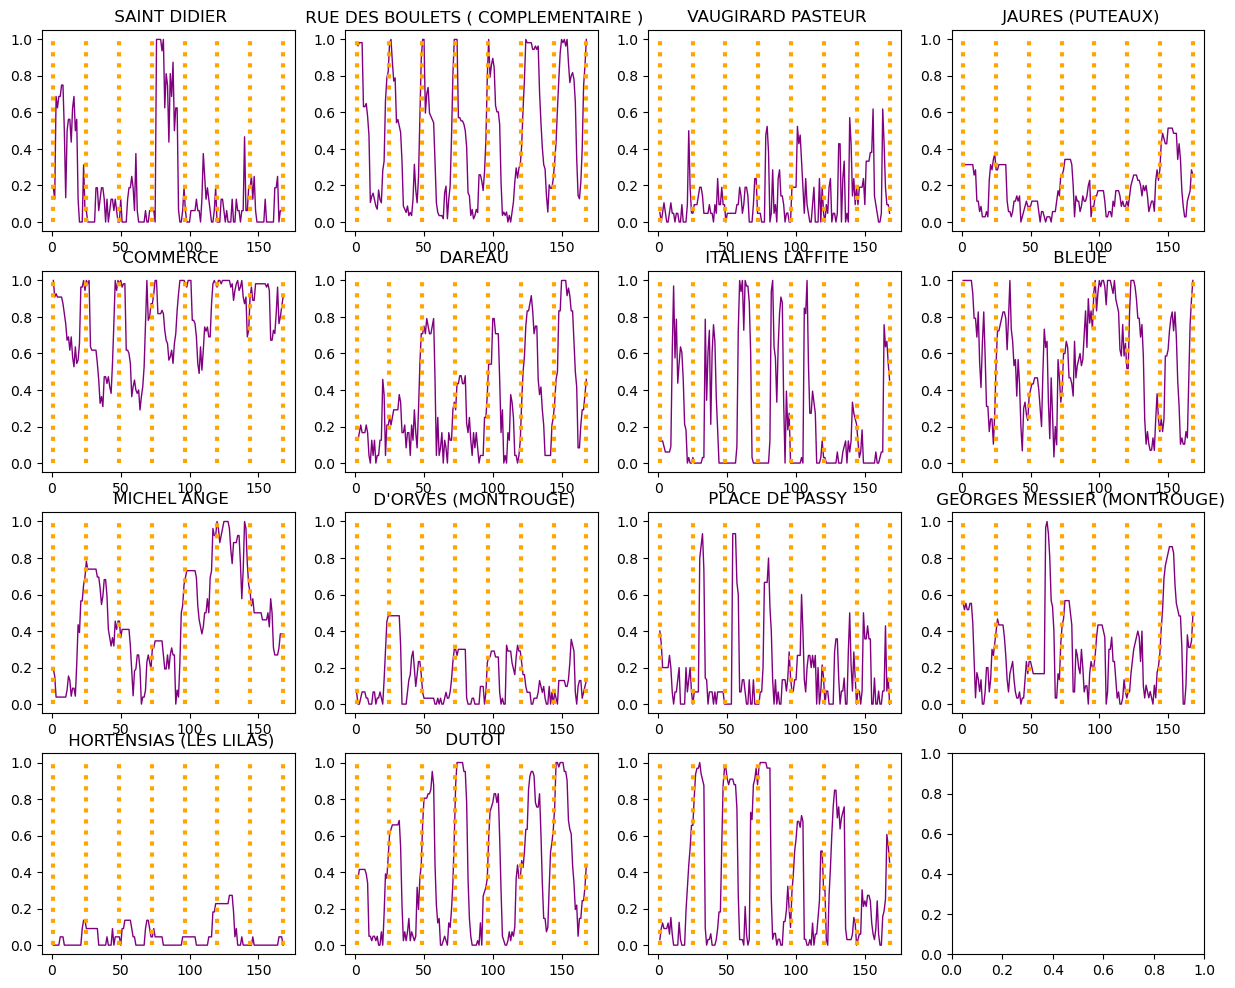

In [86]:
stations = np.arange(loading.shape[0])
rd.shuffle(stations)
stations = stations[:16] 

n_steps    = loading.shape[1]  # number of observed time steps
time_range = np.linspace(1, n_steps, n_steps)  # observed time range
time_tick  = np.linspace(1, n_steps, 8)  # beginning of days

# --- #

fig, axs = plt.subplots(4, 4, figsize = (15,12))

for i in range(4):
    for j in range(4):
        k_station = stations[4 * i + j]
        axs[i, j].plot(time_range, loading_data[k_station, :], linewidth = 1, color = 'purple')
        axs[i, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

<span style>On constate diffèrents types de distribution des données. On remarque une periodicité d'un jour pour la plupart des stations.
Pour certaines stations il y a une différence notable entre le chargement pendant les jours de semaines et ceux du week-end
Pour finir les vélos ont tendance à être moins emprunté durant les heures tardives (0h-4h) avec des chargement plus élevés.
Il y a également des diffèrences entre les profil de chargement de certaines villes.
</span>

##### <span style="color:brown">Pour confirmer les tendances journalières on trace maintenant un boxplot de toutes les données organisés par heures ainsi que le chargement selon le jour de la semaine</span>

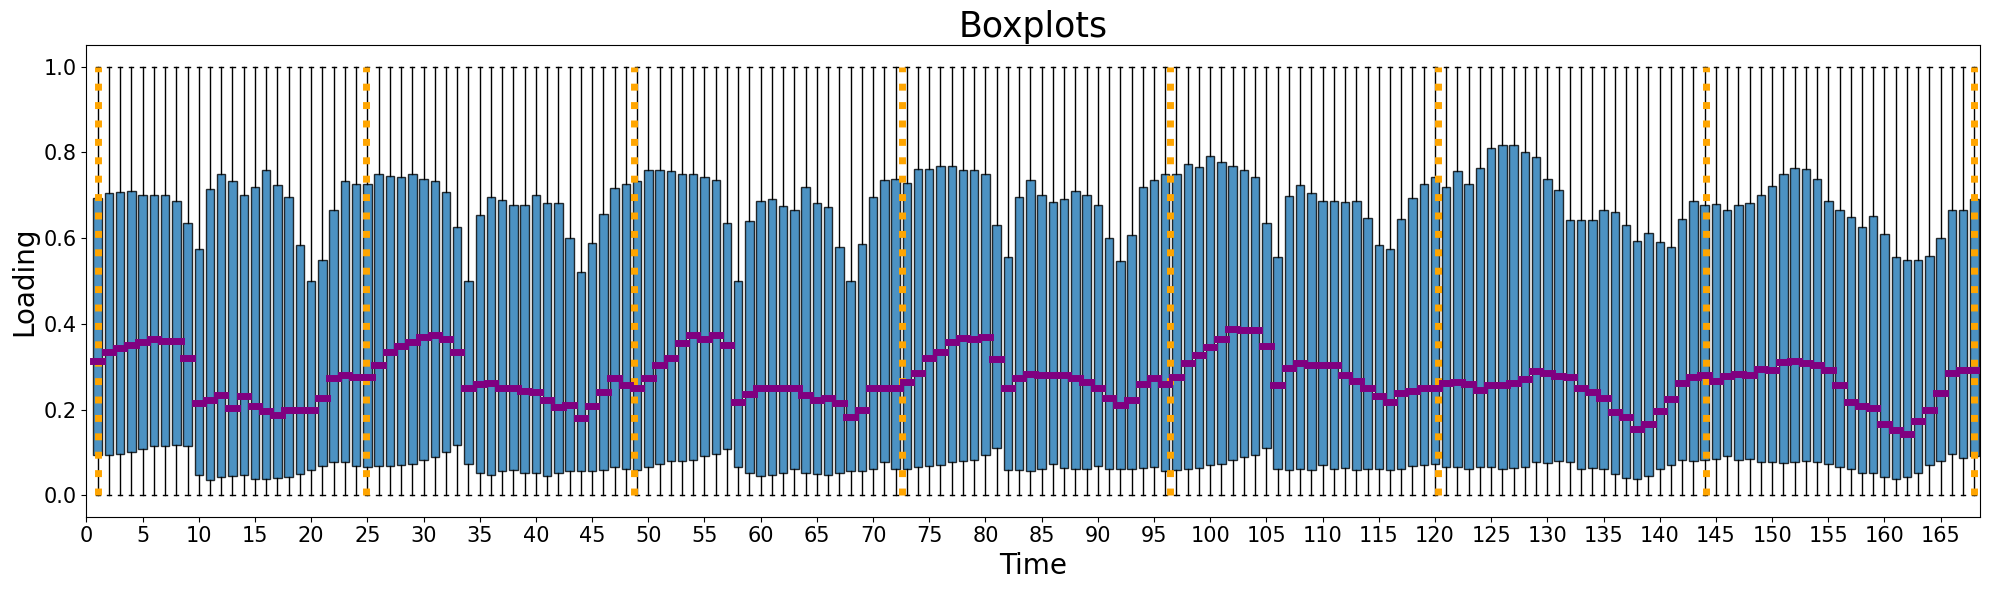

In [24]:
plt.figure(figsize = (20,6))

# --- #

bp = plt.boxplot(loading_data, widths = 0.75, patch_artist = True)


for box in bp['boxes']:
    box.set_alpha(0.8)
    
for median in bp['medians']:
    median.set(color = "Purple", linewidth=5)
    
# --- #
    
plt.vlines(x = time_tick, ymin = 0, ymax = 1, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

# --- #

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

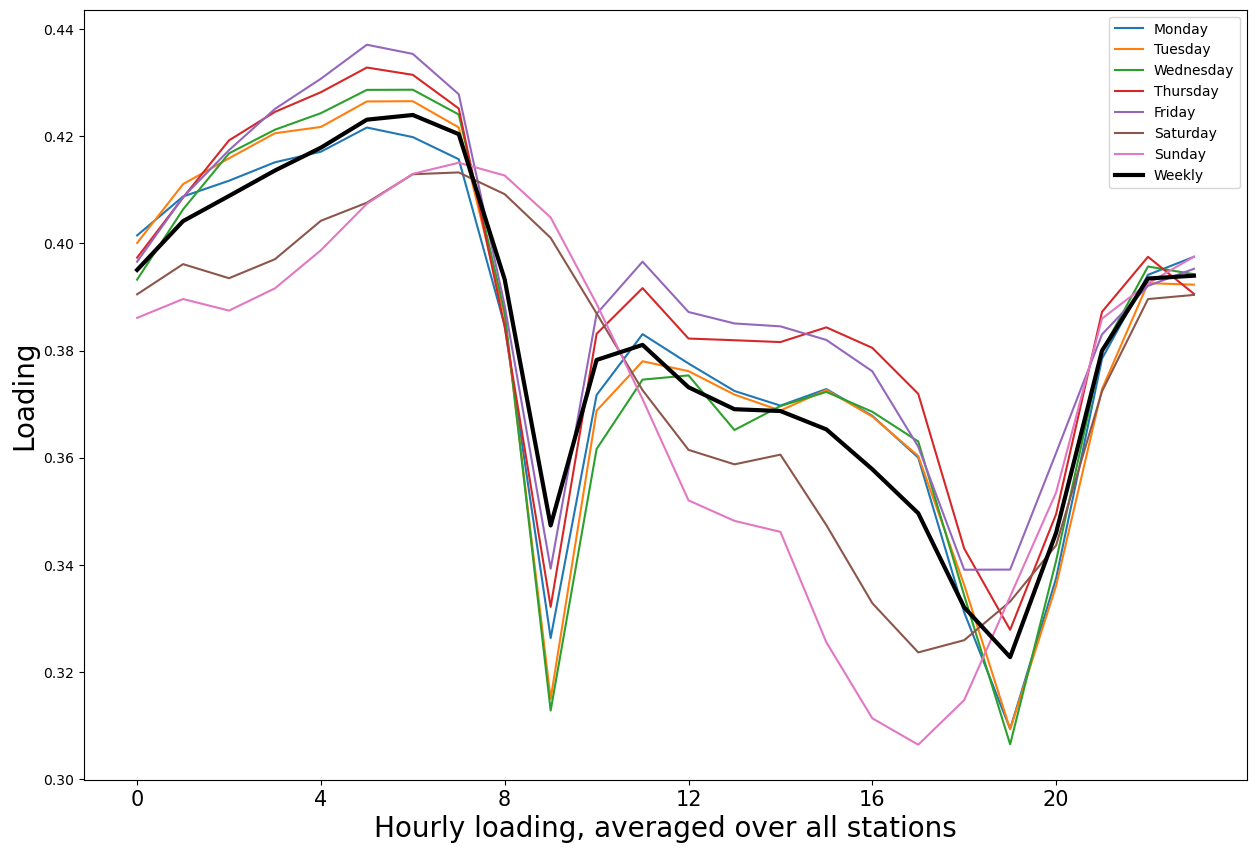

In [25]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()

##### <span >Les boxplots et les coubes confirment la périodicité journalière du chargement.Les stations sont moins chargées la semaine et durant la nuit. On observe une similarité entre les courbes des jours ouvrés d'une part ,et entre celles du week-end d'autre part. On remarque que pendant les jours de la semaines, les emprunts se font plus en début de journées vers 8h et en début de soirée vers 19h.On peut donc supposer qu'il s'agit des heures où les usagers vont et reviennent de leur travail.Alors qu'ils sont plus fréquents vers la fin d'aprés midi(17h) pendant les week-ends.On peut là supposer qu'il s'agit des heures habituels de promenande </span>

##### <span style="color:brown">On va désormais voir l'influence de la répartition géographique</span>

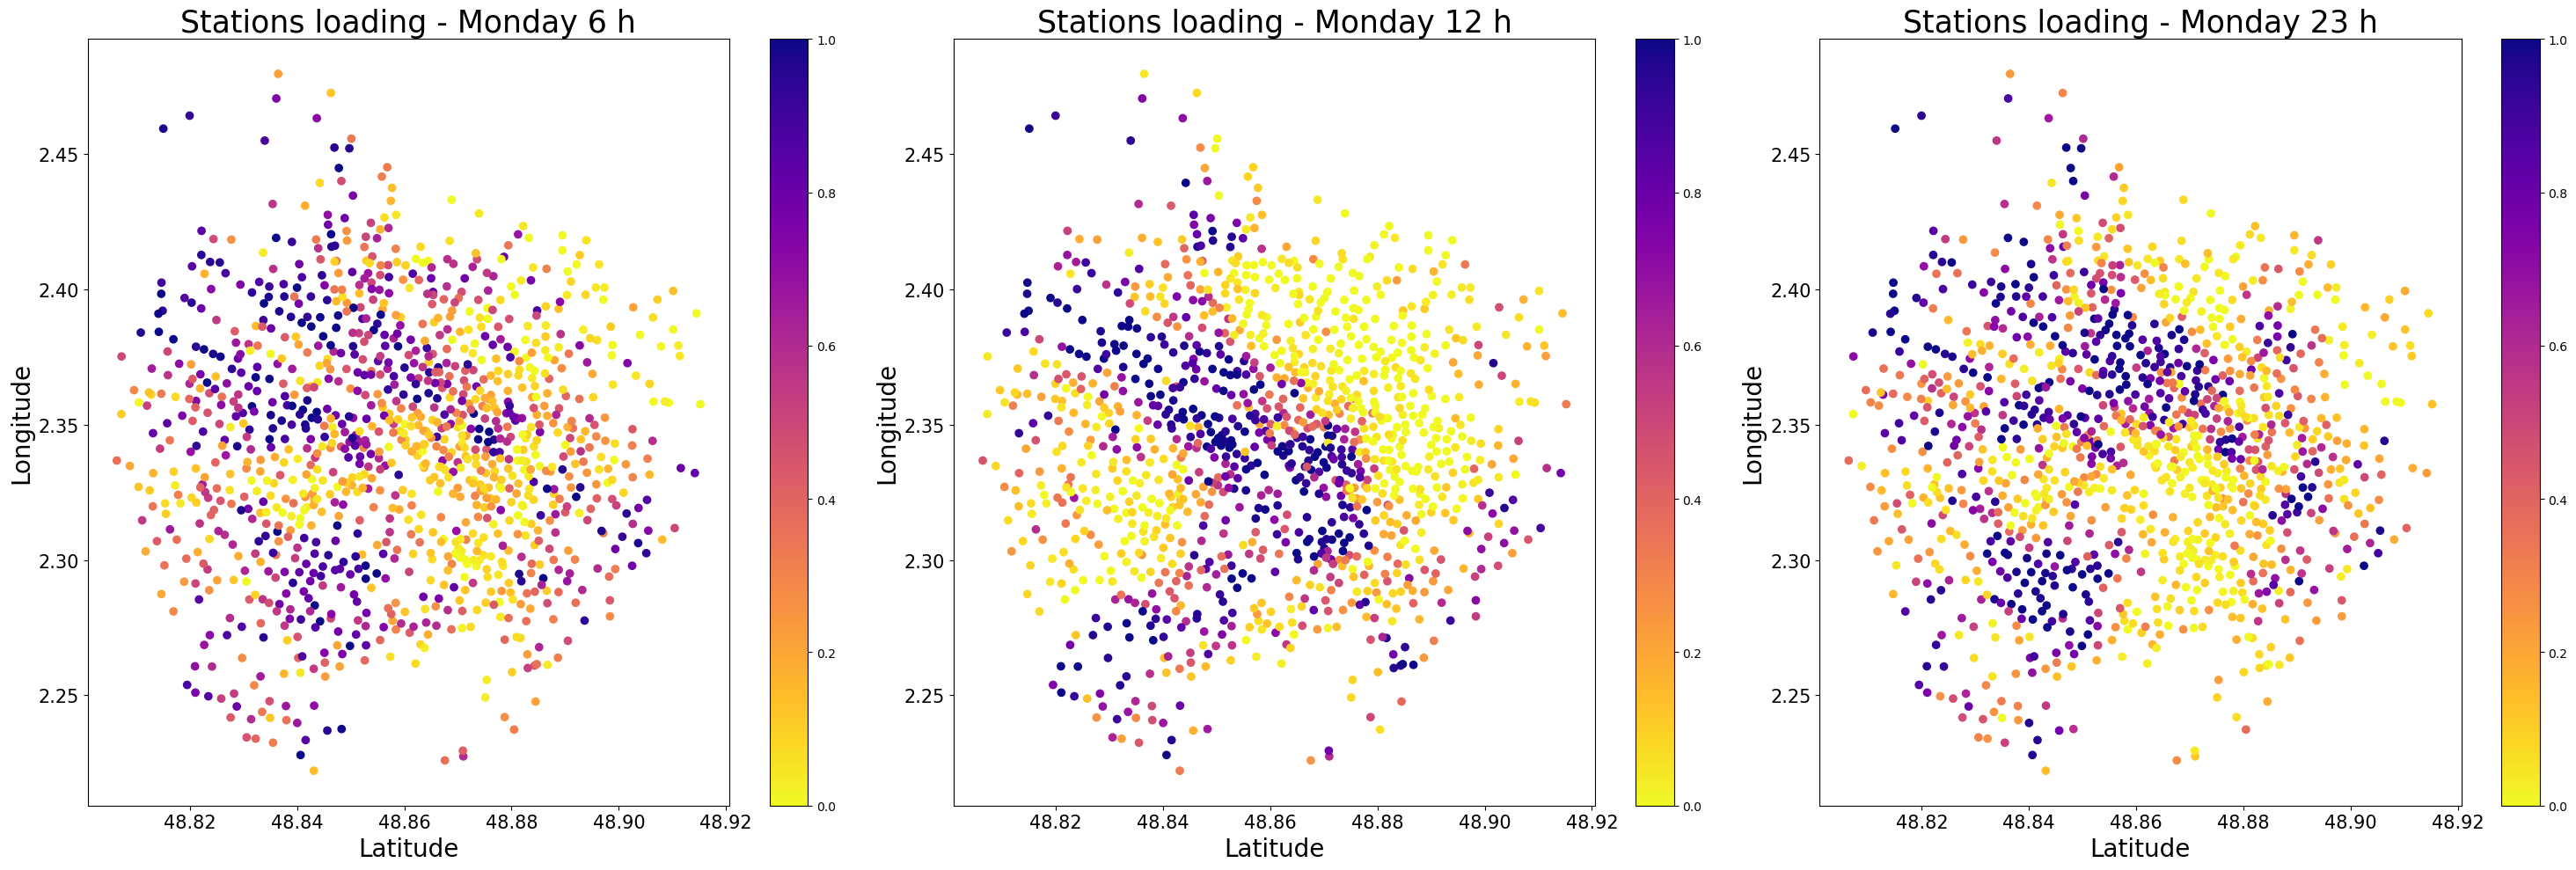

In [29]:
hours=[6,12,18]
## Simple 2D representation
# Monday at 6h, 12h and 23h

hours = [6, 12, 23]

# --- #

s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

In [35]:
## Visualization on the Paris map
# Weekly average at 6 p.m.

h = 6
hours = np.arange(h, 168, 24)
load_per_hour = loading_data[:, hours].mean(axis=1)

# --- # 

fig = px.scatter_mapbox(coord, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = "carto-positron",
                        color = load_per_hour, color_continuous_scale = px.colors.sequential.Plasma_r, #size = load_per_hour,
                        zoom  = 10, opacity = .9,
                        title = 'Stations loading - Weekly average at {} h'.format(h))

fig.show()

h = 12
hours = np.arange(h, 168, 24)
load_per_hour = loading_data[:, hours].mean(axis=1)

# --- # 

fig = px.scatter_mapbox(coord, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = "carto-positron",
                        color = load_per_hour, color_continuous_scale = px.colors.sequential.Plasma_r, #size = load_per_hour,
                        zoom  = 10, opacity = .9,
                        title = 'Stations loading - Weekly average at {} h'.format(h))

fig.show()


h = 18
hours = np.arange(h, 168, 24)
load_per_hour = loading_data[:, hours].mean(axis=1)

# --- # 

fig = px.scatter_mapbox(coord, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = "carto-positron",
                        color = load_per_hour, color_continuous_scale = px.colors.sequential.Plasma_r, #size = load_per_hour,
                        zoom  = 10, opacity = .9,
                        title = 'Stations loading - Weekly average at {} h'.format(h))

fig.show()

# ACP

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


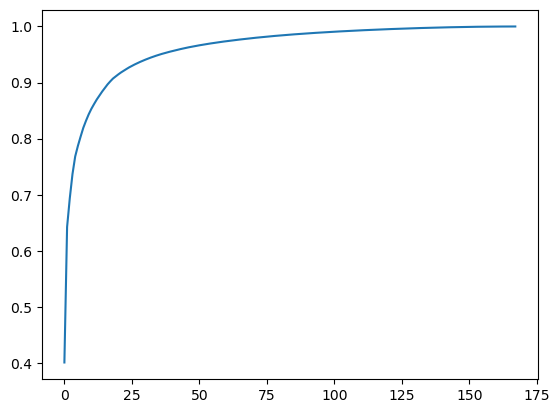

In [98]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(loading)
new_variables=pca.transform(loading)
new_variables.shape
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
loading.head()

In [89]:
pca=PCA(n_components=25)
pca.fit(loading)
new_variables=pca.transform(loading)
new_variables.shape


In [94]:
projected = pca.fit_transform(loading)

print('--- PCA ---')
print('Initial dimension:', loading.shape)
print('Dimension after projection:', projected.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')

[[-8.39328607e-13 -1.96282546e-10  2.66525560e-07 ... -3.73113224e-03
   6.24279358e-02  4.74992324e-02]
 [-8.23652258e-12  3.79585252e-11 -3.02662276e-07 ... -7.39322970e-04
  -6.78822391e-02 -4.02196178e-02]
 [ 1.67177383e-12 -2.15823803e-10  1.42685333e-07 ...  1.12890946e-04
  -5.64483958e-02  4.23811843e-03]
 ...
 [ 2.89883673e-11  2.14597451e-10  2.99730450e-07 ...  2.07564543e-02
  -8.50876421e-02 -7.96839063e-02]
 [-2.31747954e-11  7.51052553e-11 -1.44713060e-07 ...  8.91615136e-03
   8.10473201e-02  7.70249913e-02]
 [-3.03002068e-11 -3.52227580e-10 -2.12284674e-07 ... -7.00233824e-03
  -3.93009452e-02 -1.12892502e-02]]
--- PCA ---
Initial dimension: (1189, 168)
Dimension after projection: (1189, 25)

--- Explained variance ---
Component 1: 7.98 i.e. 40.07 % of the total variance
Component 2: 4.81 i.e. 24.17 % of the total variance
